# Turkiye Student Evaluation Dataset


# CLASSIFICATION PROBLEM

This data set contains a total 5820 evaluation scores provided by students from Gazi University in Ankara (Turkey)

IMPORTING THE LIBRARIES

In [1]:
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
# linear algebra
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

IMPORTING THE DATASET

In [2]:
turk_df = pd.read_csv("C:\\Users\\PUNEET SINGH\\turkiye-student-evaluation_generic.csv")
print("Shape of the dataset : {}, \n no of rows in the dataset : {} \n no of columns : {}".format(turk_df.shape,turk_df.shape[0],turk_df.shape[1]))

Shape of the dataset : (5820, 33), 
 no of rows in the dataset : 5820 
 no of columns : 33


In [3]:
turk_df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


instr: Instructor's identifier; values taken from {1,2,3}


class: Course code (descriptor); values taken from {1-13}


repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...} 


attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}


difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}


REPEAT IS THE TARGET VARIABLE IN THE DATASET.


In [4]:
# Summary of the data
turk_df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
#Inference :

# Descrpitive statistics of columns difficulty, Q1, Q2....Q28 are almost same.
# Mean and Median of class column approximately same.

In [6]:
turk_df['nb.repeat'].value_counts()

1    4909
2     576
3     335
Name: nb.repeat, dtype: int64

In [7]:
# It is a classification problem 
# So Encoding the values into 0 and 1 for better accuracy

In [8]:
# Converting the Target Variable values into Binary form manually
# As the Target variable contains four unique values 
# So Encoding (unn,acc==0) and (good,vgood==1) for better Accuracy
turk_df['nb.repeat'].replace((1,2,3), (0,1,1), inplace = True)
turk_df['nb.repeat'].value_counts()

0    4909
1     911
Name: nb.repeat, dtype: int64

In [9]:
# Checking for the Info of the data
turk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
instr         5820 non-null int64
class         5820 non-null int64
nb.repeat     5820 non-null int64
attendance    5820 non-null int64
difficulty    5820 non-null int64
Q1            5820 non-null int64
Q2            5820 non-null int64
Q3            5820 non-null int64
Q4            5820 non-null int64
Q5            5820 non-null int64
Q6            5820 non-null int64
Q7            5820 non-null int64
Q8            5820 non-null int64
Q9            5820 non-null int64
Q10           5820 non-null int64
Q11           5820 non-null int64
Q12           5820 non-null int64
Q13           5820 non-null int64
Q14           5820 non-null int64
Q15           5820 non-null int64
Q16           5820 non-null int64
Q17           5820 non-null int64
Q18           5820 non-null int64
Q19           5820 non-null int64
Q20           5820 non-null int64
Q21           5820 non-null int64
Q22      

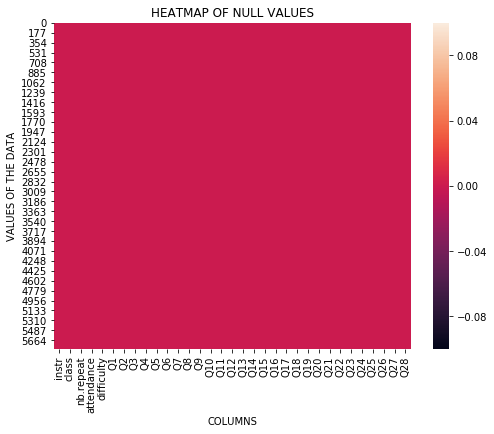

In [10]:
# Checking for the null values in the data through heat map
turk_df.isnull().sum()
plt.figure(figsize=(8,6))
sns.heatmap(turk_df.isnull())
plt.xlabel("COLUMNS")
plt.ylabel("VALUES OF THE DATA")
plt.title("HEATMAP OF NULL VALUES")
plt.show()

Exploratory Data Analysis 

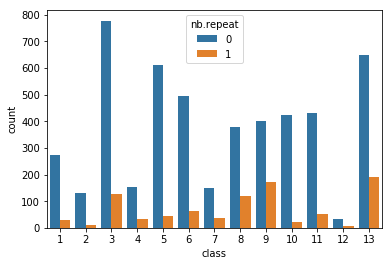

In [11]:
sns.countplot(x='class',hue='nb.repeat',data=turk_df)
plt.show()

In [12]:
# From the bar graph it is clear that class 9 and 13 students took the course maximum number of times

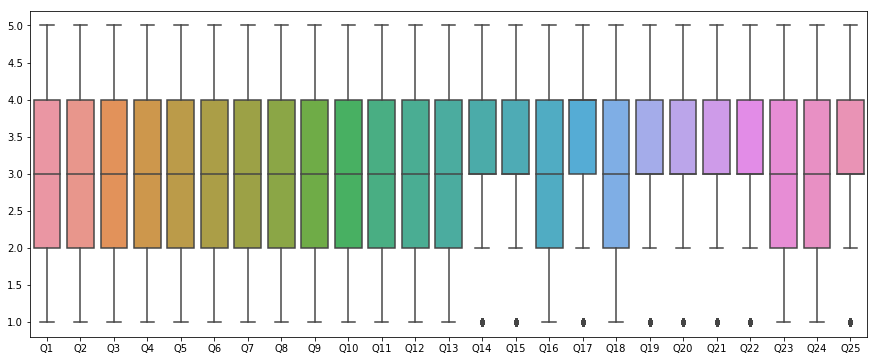

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(data=turk_df.loc[:,'Q1':'Q25'])
plt.show()

In [14]:
# Few features have some outliers

In [15]:
turk_df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,0,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,0,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,0,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,0,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [16]:
# Scaling the data through Standard Scaler
# Importing the Library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [17]:
# Dividing the Independent and Dependent Variables
X = turk_df.drop("nb.repeat",axis=1)
y = turk_df['nb.repeat']

In [18]:
y.value_counts()

0    4909
1     911
Name: nb.repeat, dtype: int64

In [19]:
X = sc.fit_transform(X)
X = pd.DataFrame(X).astype(int)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-2,-1,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-2,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-2,-1,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,-2,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [20]:
y.value_counts()

0    4909
1     911
Name: nb.repeat, dtype: int64

In [21]:
# Splitting the data and a function for metrics measure
from sklearn.model_selection import train_test_split
from sklearn import metrics
# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred,X_test, model):
 print('Accuracy Score :', metrics.accuracy_score(y_test, y_pred)*100)   
 print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
 print('Classification Report :\n',metrics.classification_report( y_test, y_pred ))

In [22]:
#similarly define a function for Logistic regressor
from sklearn.linear_model import LogisticRegression
def LogisticRegressionModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    lg = LogisticRegression(random_state=42)
    lg.fit(X_train, y_train)
    y_pred = lg.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, lg))
    return lg
LogisticRegressionModel = LogisticRegressionModel(X,y)

Accuracy Score : 84.36426116838489
Confusion Matrix:
 [[1470    4]
 [ 269    3]]
Classification Report :
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1474
           1       0.43      0.01      0.02       272

   micro avg       0.84      0.84      0.84      1746
   macro avg       0.64      0.50      0.47      1746
weighted avg       0.78      0.84      0.78      1746

None


In [23]:
# Our Data is not balanced . So accuracy score would not be a good measure for measuring the accuracy of the model . 
# Hence we can use the F1 score to check the model accuracy which is 92% which is good . 

In [24]:
#similarly define a function for random forest regressor
from sklearn.ensemble import RandomForestClassifier
def RandomForestClassifierModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3,stratify=y)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
RandomForestClassifierModel = RandomForestClassifierModel(X,y)

Accuracy Score : 82.4742268041237
Confusion Matrix:
 [[1414   59]
 [ 247   26]]
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1473
           1       0.31      0.10      0.15       273

   micro avg       0.82      0.82      0.82      1746
   macro avg       0.58      0.53      0.52      1746
weighted avg       0.77      0.82      0.78      1746

None


In [25]:
# We can compare our both the models and see that Logistic Regressor is predicting more accurate than our RF

In [26]:
#similarly define a function for Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
def DecisionTreeClassifierModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3,stratify=y)
    dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, dtc))
    return dtc
DecisionTreeClassifierModel = DecisionTreeClassifierModel(X,y)

Accuracy Score : 84.24971363115694
Confusion Matrix:
 [[1469    4]
 [ 271    2]]
Classification Report :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1473
           1       0.33      0.01      0.01       273

   micro avg       0.84      0.84      0.84      1746
   macro avg       0.59      0.50      0.46      1746
weighted avg       0.76      0.84      0.77      1746

None


In [27]:
# From the results it clear that Decision tree is predicting better than Rf and Logistic Regression

In [28]:
# For applying the PCA firstly we have to split the model in x_train,y_train
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)

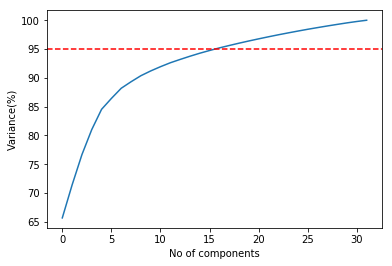

In [29]:
# Now applying the PRINCIPAL COMPONENT ANALYISIS
# Importing the Library
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
# n_components=None as we have to first decide the n_component
pca.fit(X_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No of components")
plt.ylabel("Variance(%)")
plt.axhline(y=95,color='r',linestyle='--')

In [30]:
# So from the plot we can see and make the 
# N_components = 15
# So appyling the PCA now
pca = PCA(n_components=15)
X_transformed=pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

In [31]:
# Importing the Measure Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# Now using the logistic model 
lg = LogisticRegression()
lg.fit(X_transformed,y_train)
y_pred = lg.predict(X_test_transformed)
print("Accuracy score :",accuracy_score(y_pred,y_test))
print("Confusion matrix :",confusion_matrix(y_pred,y_test))
print("Classification Report:\n",classification_report(y_pred,y_test))

Accuracy score : 0.8436426116838488
Confusion matrix : [[1472  271]
 [   2    1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.92      1743
           1       0.00      0.33      0.01         3

   micro avg       0.84      0.84      0.84      1746
   macro avg       0.50      0.59      0.46      1746
weighted avg       1.00      0.84      0.91      1746



In [32]:
# Using the Random Forest Model
rf = RandomForestClassifier(n_estimators=30,max_depth=7)
rf.fit(X_transformed,y_train)
y_pred = rf.predict(X_test_transformed)
print("Accuracy score :",accuracy_score(y_pred,y_test))
print("Confusion matrix :",confusion_matrix(y_pred,y_test))
print("Classification Report:\n",classification_report(y_pred,y_test))

Accuracy score : 0.843069873997709
Confusion matrix : [[1472  272]
 [   2    0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      1744
           1       0.00      0.00      0.00         2

   micro avg       0.84      0.84      0.84      1746
   macro avg       0.50      0.42      0.46      1746
weighted avg       1.00      0.84      0.91      1746



In [33]:
# Using the Decision Tree model
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_transformed,y_train)
y_pred = dtc.predict(X_test_transformed)
print("Accuracy score :",accuracy_score(y_pred,y_test))
print("Confusion matrix :",confusion_matrix(y_pred,y_test))
print("Classification Report:\n",classification_report(y_pred,y_test))

Accuracy score : 0.8367697594501718
Confusion matrix : [[1456  267]
 [  18    5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      1723
           1       0.02      0.22      0.03        23

   micro avg       0.84      0.84      0.84      1746
   macro avg       0.50      0.53      0.47      1746
weighted avg       0.98      0.84      0.90      1746



After applying the PCA we can see that Precision and F1 score of the Random Forest Model and Decision tree has been increased.

In [34]:
# Applying the GridSearchCV on the RandomForestModel
# Importing the Library
from sklearn.model_selection import GridSearchCV
param = [{'n_estimators':[30,40,50],'criterion':['entropy','gini'],'max_depth':[3,4,5,6,7,8,9]}]
grid_search = GridSearchCV(estimator=rf,param_grid=param,n_jobs=-1)

In [35]:
grid_search.fit(X_transformed,y_train)
grid_search.predict(X_test_transformed)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
print("Best score of the model :",grid_search.best_score_)
print("Best parameter of the model :",grid_search.best_params_)

Best score of the model : 0.84413352970054
Best parameter of the model : {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 50}


We can see that before applying the PCA accuracy score of the Random Forest model was 82.47 % and after applying the PCA accuracy score of the model became 84.16 % . After applying the HYPERPARAMTER TUNING accuracy score of the model became 84.46%
which is best.
Best parameters has also been choosen after applying the GridsearchCV

In [37]:
# Saving the Random Forest Model as it has predicted the best 
# Importing Pickle
import pickle
filehandler = open("Project_36.obj","wb")
# saving the model in pickel string
saved_rf_model = pickle.dump(rf,filehandler)
filehandler.close()